## Bibliothèques

In [1]:
import numpy as np
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import utils
import keras
import pandas as pd
from keras import layers
from keras import initializers

# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

### Data Augmentation :

La **data augmentation** est utilisée pour augmenter la diversité du jeu de données en appliquant diverses transformations aux images existantes. Nous utilisons la classe **`ImageDataGenerator`** de Keras pour effectuer ces transformations afin de rendre le modèle plus robuste et généraliser sur de nouveaux exemples. Voici les paramètres utilisés dans cette configuration :

- **`rotation_range`** : Limité à 20 degrés pour introduire une plus grande variété d'orientations tout en préservant les caractéristiques essentielles des chiens.
- **`width_shift_range` et `height_shift_range`** : Décalages horizontaux et verticaux jusqu'à 25% de l'image pour simuler différentes positions des chiens dans le cadre et ajouter de la diversité.
- **`shear_range`** : Transformation de cisaillement jusqu'à 25% pour simuler des changements de perspective.
- **`zoom_range`** : Zoom jusqu'à 25% pour varier la taille des chiens dans l'image.
- **`horizontal_flip`** : Retournement horizontal des images activé pour améliorer la généralisation du modèle.
- **`vertical_flip`** : Activé pour augmenter la diversité des orientations des images de chiens.
- **`brightness_range`** : Ajuste la luminosité entre 90% et 110% de l'original pour simuler de légères variations d'éclairage naturel.
- **`channel_shift_range`** : Modifie les canaux de couleur jusqu'à 10% pour introduire une diversité subtile dans les teintes et les couleurs des images.
- **`fill_mode`** : Utilise la méthode `'nearest'` pour remplir les pixels manquants après les transformations.
- **`rescale`** : Normalise les valeurs des pixels entre 0 et 1 en divisant par 255, facilitant la convergence du modèle pendant l'entraînement.
- **`validation_split`** : Réserve 20% des données pour la validation, offrant un bon équilibre entre les données d'entraînement et de validation.

In [2]:
img_generator = utils.create_image_generator()

### Chargement des données d'entraînement et de validation :

On charge les images à partir d'un répertoire spécifié, organisé en sous-dossiers représentant différentes classes, en utilisant la fonction **`flow_from_directory`** de Keras. Cette fonction facilite la création de générateurs qui alimentent les données dans le modèle lors de l'entraînement et la validation. Le générateur d'images divise automatiquement les données en deux sous-ensembles pour l'entraînement (80%) et la validation (20%). Voici les paramètres configurés :

- **`flow_from_directory`** : Charge les images à partir d'un répertoire en les classant par sous-dossiers.
- **`target_size`** : Redimensionne toutes les images à 224x224 pixels pour assurer la compatibilité avec les exigences du modèle.
- **`batch_size`** : Définit à 16, le nombre d'images traitées par lot, ce qui est essentiel pour l'efficacité de l'entraînement.
- **`shuffle`** : Mélange aléatoirement les images avant chaque époque pour améliorer la généralisation du modèle.
- **`class_mode`** : Défini en 'categorical', adapté pour des classifications multiples.
- **`subset`** : Utilisé pour spécifier les sous-ensembles de données pour l'entraînement ('training') et pour la validation ('validation').

In [3]:
data_dir = 'data'

train_generator, validation_generator = utils.create_data_generators(img_generator, data_dir)

class_names = list(train_generator.class_indices.keys())

Found 389 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


Voici l'affichage des 16 premières images d'entraînement avec leurs étiquettes, montrant un échantillon des trois races de chiens du dataset:

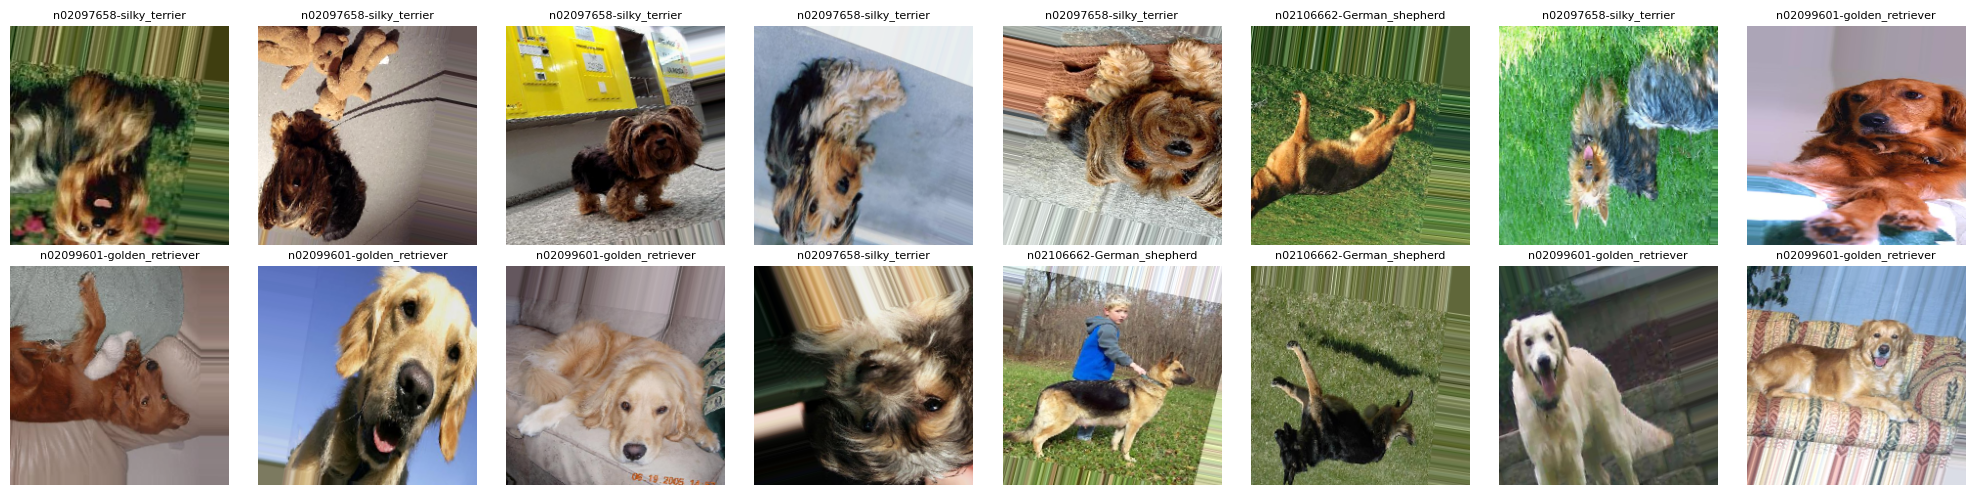

In [4]:
utils.visualize_batch(train_generator, num_rows=2)

### Modèle CNN Simple:

on définis un modèle CNN simple composé de trois blocs de convolution suivis d'un bloc fully-connected. Chaque bloc convolutif est suivi d'une opération de max pooling pour réduire les dimensions spatiales tout en conservant les informations importantes:

- **`Bloc 1 à Bloc 3 : Convolution + MaxPooling:`** : Chaque bloc applique des filtres convolutifs pour extraire les caractéristiques des images, suivis de MaxPooling pour réduire la taille des caractéristiques tout en conservant les plus pertinentes.

- **`Bloc 4 : Fully Connected :`** : Les caractéristiques extraites sont aplaties en un vecteur, puis passent par une couche dense avant d'aboutir à une couche de sortie softmax qui prédit la classe de l'image.


In [5]:
model_simple = utils.create_simple_model()

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilation du modèle :

Je vais compiler le modèle avec les paramètres suivants :

- **`Adam`** : Un optimiseur adaptatif qui ajuste les taux d'apprentissage individuellement pour chaque paramètre du modèle. Ici, il est configuré avec un taux d'apprentissage de 0.0001.
- **`categorical_crossentropy`** : La fonction de perte appropriée pour les tâches de classification multi-classes, utilisée pour mesurer la différence entre les probabilités prédites par le modèle et les classes réelles.

In [6]:
# Ajustement du learning rate
learning_rate = 0.0001
opt = Adam(learning_rate=learning_rate)

# Compilation du modèle
model_simple.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


#### Visualisation du modèle :

on affiche l'architecture du modèle:

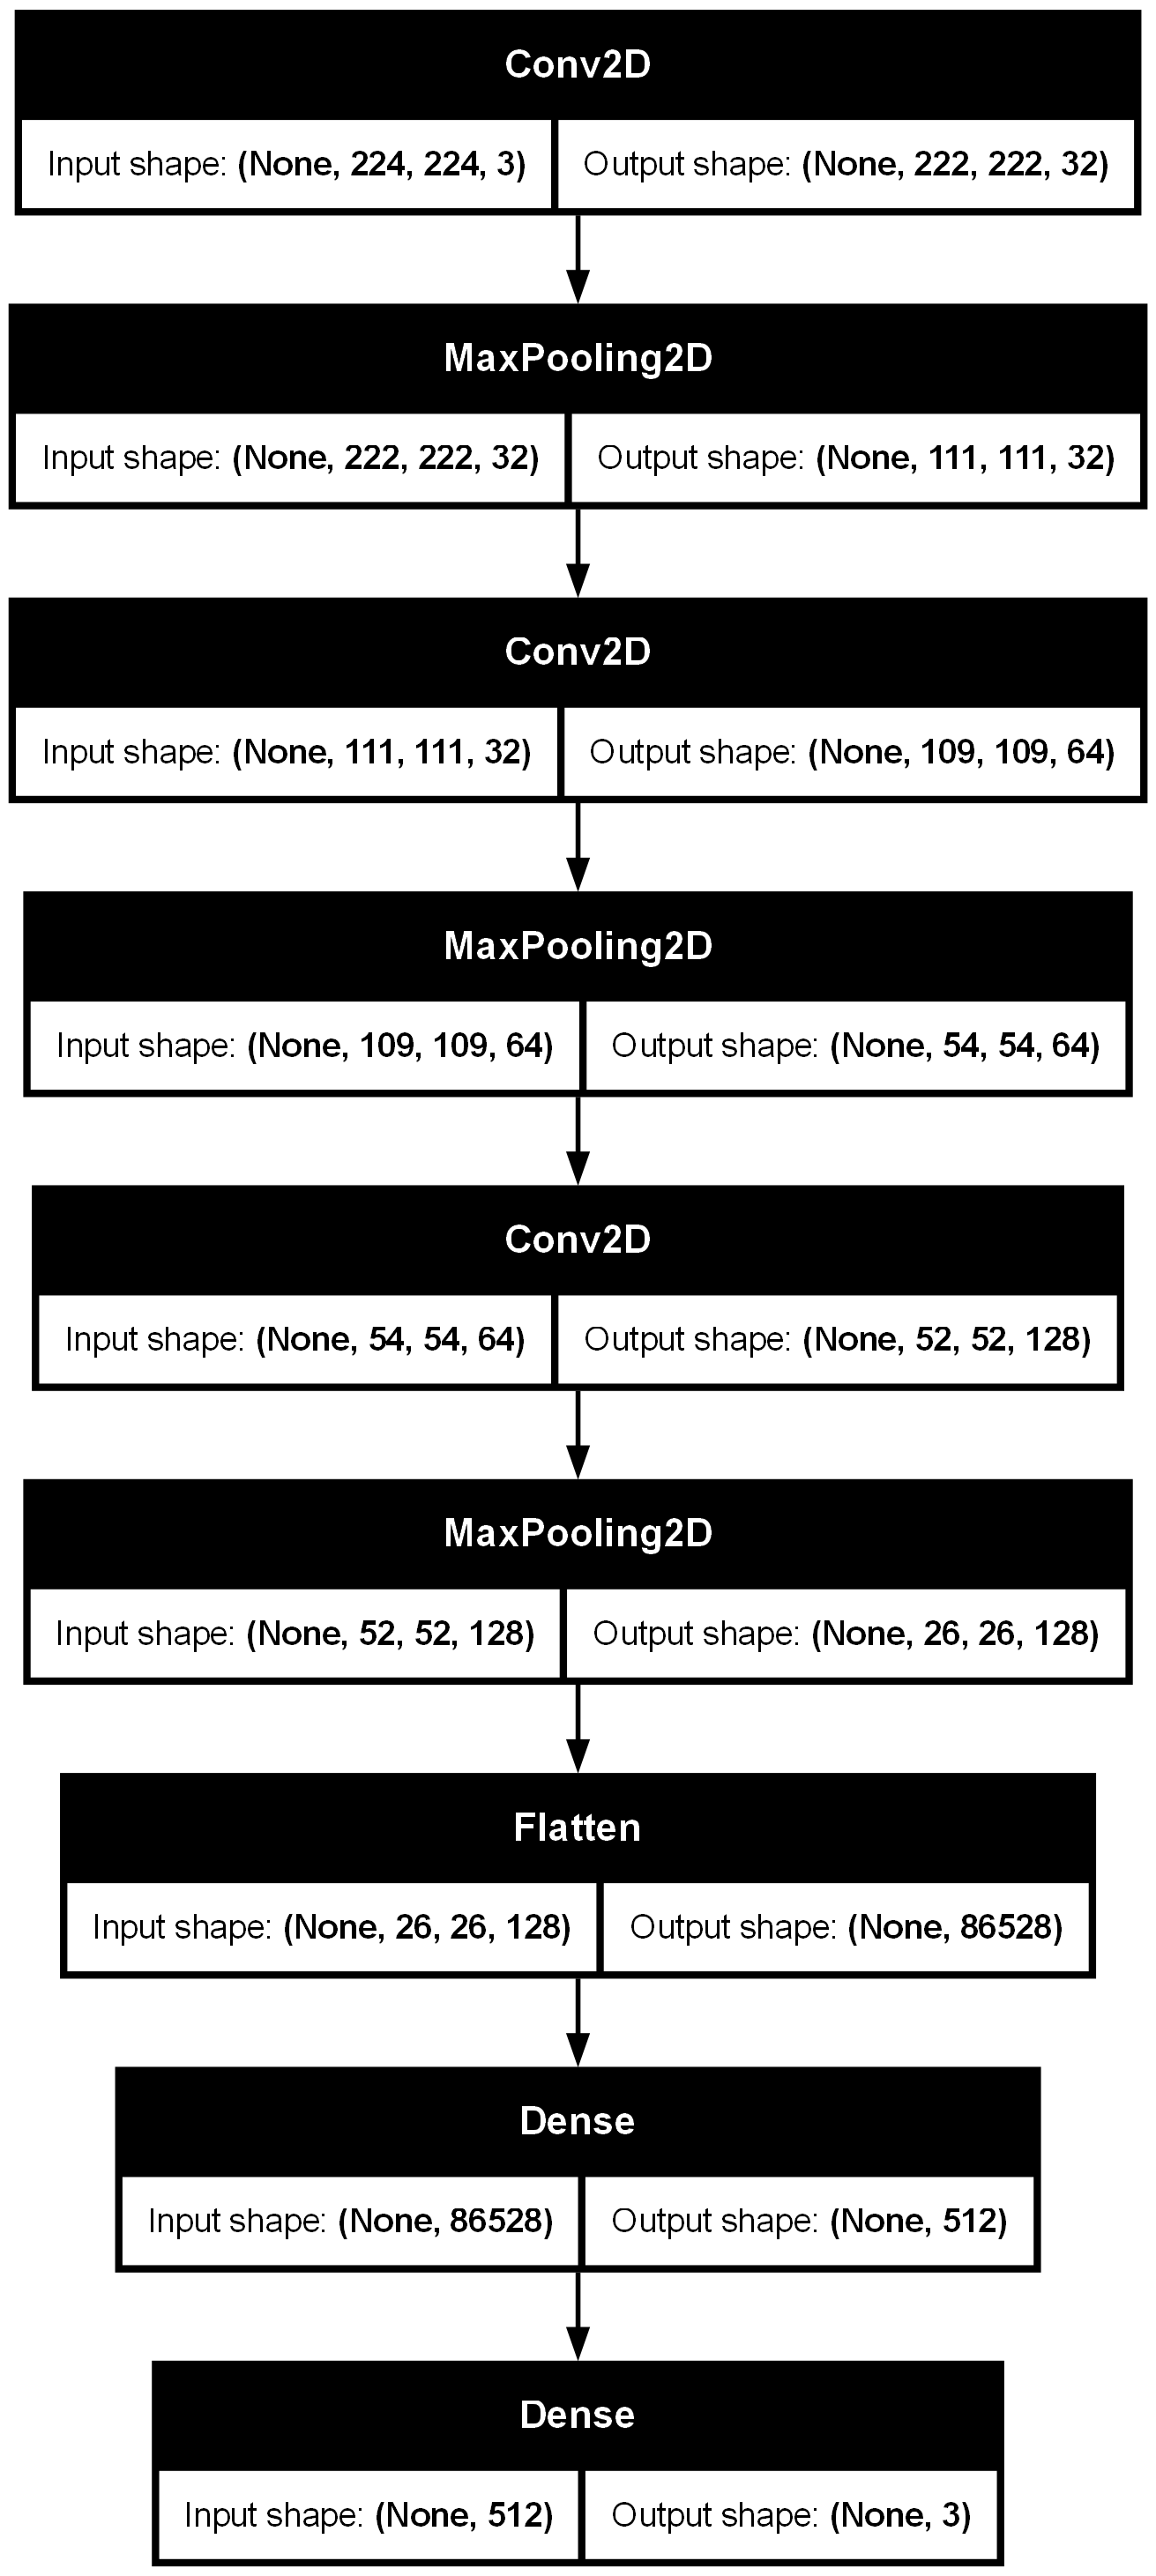

In [7]:
# Visualisation de l'architecture du modèle
tf.keras.utils.plot_model(model_simple, show_shapes=True)

#### Affichage du résumé du modèle :
Voici le résumé détaillé du modèle:

In [8]:
model_simple.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,397,635 (169.36 MB)

 Trainable params: 44,397,635 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrainement du modèle simple:

In [9]:
history_simple = model_simple.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator
)

Epoch 1/60


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 448ms/step - accuracy: 0.3193 - loss: 1.3338 - val_accuracy: 0.5000 - val_loss: 1.0852
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 422ms/step - accuracy: 0.3968 - loss: 1.0863 - val_accuracy: 0.4479 - val_loss: 1.0542
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 420ms/step - accuracy: 0.4246 - loss: 1.0604 - val_accuracy: 0.5000 - val_loss: 1.0307
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - accuracy: 0.4129 - loss: 1.0328 - val_accuracy: 0.4479 - val_loss: 1.0296
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 419ms/step - accuracy: 0.5337 - loss: 0.9878 - val_accuracy: 0.5000 - val_loss: 1.0139
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 418ms/step - accuracy: 0.4878 - loss: 1.0096 - val_accuracy: 0.5208 - val_loss: 0.9939
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 420ms/step - accuracy: 0.4973 - loss: 0.9946 - val_accuracy: 0.4375 - val_loss: 0.9834
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 420ms/step - accuracy: 0.5237 - loss: 0.9567 - val_accuracy: 0.468

#### Calcul des prédictions et des classes réelles

In [10]:
# Calcul des prédictions et des classes réelles
y_pred = model_simple.predict(validation_generator)  # Prédictions du modèle sur les données de validation
y_true = validation_generator.classes          # Les vraies étiquettes des données de validation
y_pred_classes = np.argmax(y_pred, axis=1)     # Conversion des prédictions en classes prédominantes

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


### Affichage de la matrice de confusion et du rapport de classification du modèle simple:

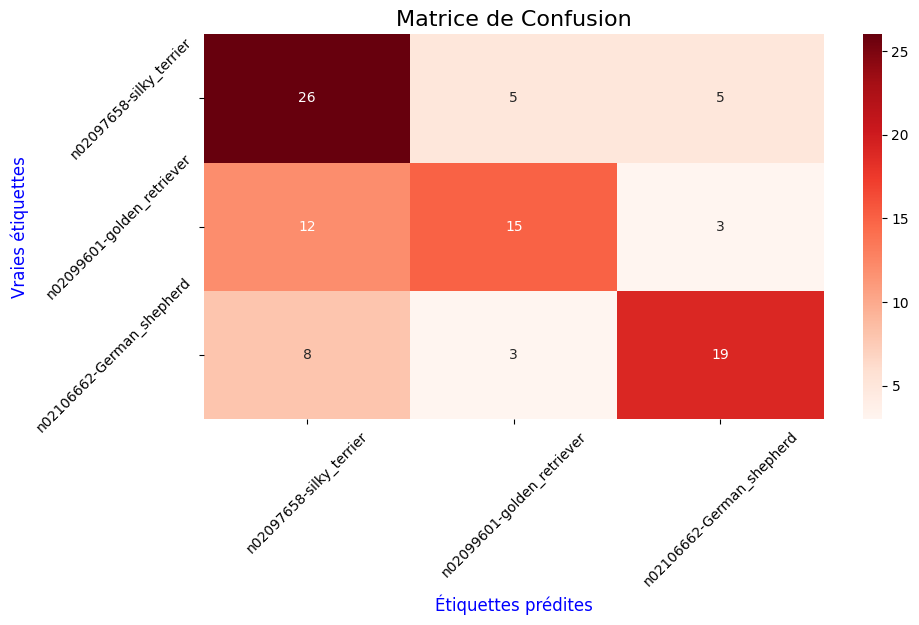

In [11]:
conf_matrix_simple = utils.plot_confusion_matrix(y_true, y_pred_classes, class_names)

In [12]:
df_report_simple = utils.classification_report_df(y_true, y_pred_classes, class_names)
display(df_report_simple)

,precision,recall,f1-score,support
n02097658-silky_terrier,0.57,0.72,0.63,36.00
n02099601-golden_retriever,0.65,0.50,0.57,30.00
n02106662-German_shepherd,0.70,0.63,0.67,30.00
accuracy,0.62,0.62,0.62,0.62
macro avg,0.64,0.62,0.62,96.00
weighted avg,0.64,0.62,0.62,96.00


### Conclusion du modèle simple :

### Analyse Détaillée de la Matrice de Confusion

1. **Silky Terrier** :
   - **Vrais Positifs (TP)** : 26 Silky Terriers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 10 Silky Terriers sont incorrectement classifiés comme d'autres races (5 comme **Golden Retriever**, 5 comme **German Shepherd**).
   - **Faux Positifs (FP)** : 20 prédictions incorrectes où des **Golden Retrievers** et des **German Shepherds** sont faussement identifiés comme **Silky Terriers**.

2. **Golden Retriever** :
   - **Vrais Positifs (TP)** : 15 Golden Retrievers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 15 Golden Retrievers sont incorrectement classifiés comme d'autres races (12 comme **Silky Terriers**, 3 comme **German Shepherds**).
   - **Faux Positifs (FP)** : 8 prédictions incorrectes où des **Silky Terriers** et des **German Shepherds** sont faussement identifiés comme **Golden Retrievers**.

3. **German Shepherd** :
   - **Vrais Positifs (TP)** : 19 German Shepherds sont correctement identifiés.
   - **Faux Négatifs (FN)** : 11 German Shepherds sont incorrectement classifiés comme d'autres races (8 comme **Silky Terriers**, 3 comme **Golden Retrievers**).
   - **Faux Positifs (FP)** : 8 prédictions incorrectes où des **Silky Terriers** et des **Golden Retrievers** sont faussement identifiés comme **German Shepherds**.

### Analyse Détaillée de la Classification :

Le modèle **simple** montre une performance globale modérée avec une accuracy (précision globale) de **62%** sur l'ensemble des données testées. Voici les scores F1 pour chaque classe :

- **Silky Terrier** : 
  - Précision : 57%
  - Rappel : 72%
  - F1-score : 63%
  
- **Golden Retriever** :
  - Précision : 65%
  - Rappel : 50%
  - F1-score : 57%
  
- **German Shepherd** :
  - Précision : 70%
  - Rappel : 63%
  - F1-score : 67%

### Précision Globale : **62%**

Le modèle simple parvient à bien détecter les **Silky Terriers** et les **German Shepherds**, mais présente des erreurs importantes pour les **Golden Retrievers**. Malgré un bon rappel pour les **Silky Terriers**, il reste des difficultés à réduire les faux positifs, en particulier lors de la classification croisée des races.

#### Affichage de la courbe de perte (loss) du modèle simple :

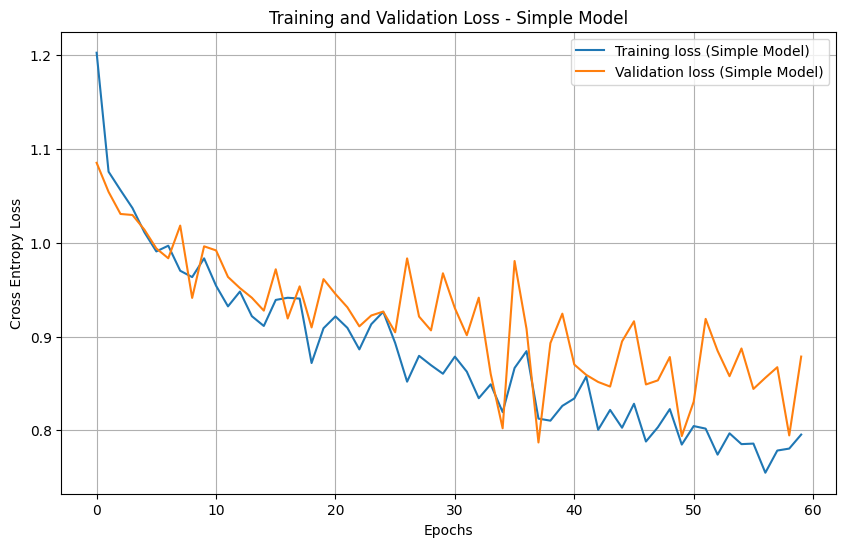

In [13]:
utils.plot_loss_curves(history_simple, model_name="Simple Model", color_chart=None)

#### Affichage du graphique des courbes d'accuracy pour le modèle simple:

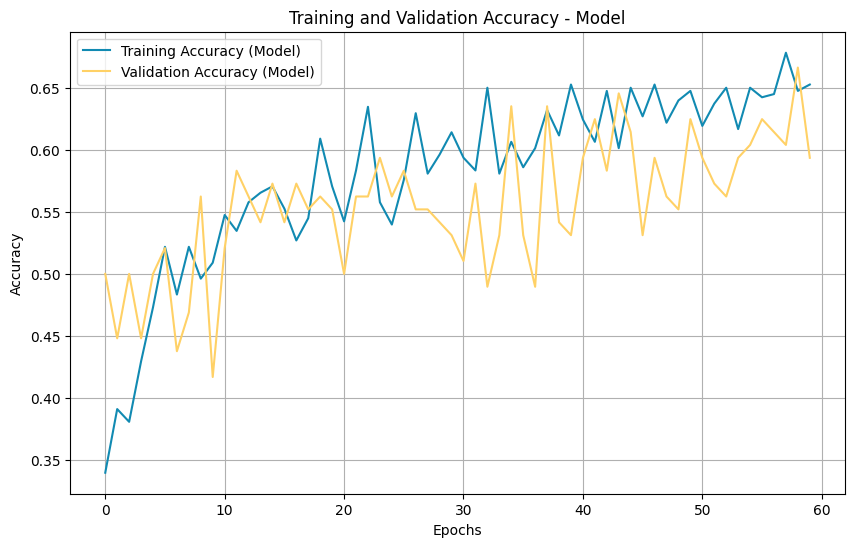

In [14]:
utils.plot_accuracy_curves(history_simple, model_name="Model", color_chart=None)

#### Conclusion:
##### Analyse de la Perte d'Entraînement et de Validation
- **Perte d'Entraînement (Bleu)** : La perte d'entraînement diminue régulièrement, indiquant un apprentissage efficace. Cependant, les gains d'apprentissage ralentissent avec le temps, suggérant une saturation de l'apprentissage.
- **Perte de Validation (Orange)** : La courbe de la perte de validation montre des fluctuations, pointant vers un potentiel surapprentissage, surtout lorsque la perte de validation augmente alors que celle d'entraînement continue de baisser.

##### Analyse de la Précision d'Entraînement et de Validation
- **Précision d'Entraînement (Bleu)** : La précision d'entraînement s'améliore pour atteindre environ 65%, montrant une progression constante.
- **Précision de Validation (Orange)** : La précision de validation reste inférieure à celle d'entraînement et varie entre 55-60%, reflétant des défis de généralisation et une sensibilité aux variations des données de validation.

Le modèle, tout en apprenant des données d'entraînement, montre des signes de surapprentissage comme en témoignent les écarts entre les performances sur les données d'entraînement et de validation. Les fluctuations dans la précision et la perte de validation soulignent la nécessité d'améliorer les techniques pour renforcer la généralisation et réduire le surapprentissage.

### `Conclusion générale du modèle simple :`

Le modèle montre une capacité d'apprentissage avec une précision d'entraînement atteignant 65%, mais des difficultés de généralisation et des signes de surapprentissage sont évidents à cause des fluctuations dans la perte de validation. La matrice de confusion révèle des variations dans la classification des races de chiens, avec une précision modérée pour les Silky Terriers et une meilleure performance pour les German Shepherds. Ces résultats soulignent le besoin d'améliorer les techniques pour renforcer la généralisation et réduire le surapprentissage afin d'accroître la précision et le rappel de la classification des races.

### Modèle CNN Plus Complexe :

Ce modèle est significativement plus complexe que le modèle précédent et incorpore plusieurs techniques avancées pour améliorer les performances et la capacité d'apprentissage :

- **`Blocs 1 à 4 : Double Convolution + BatchNormalization + MaxPooling`** :
   - Chaque bloc comporte deux couches convolutives successives, avec un nombre de filtres qui augmente progressivement (32, 64, 128, 256). Cette structure permet d'extraire des caractéristiques de plus en plus complexes et abstraites des images.
   - La **BatchNormalization** est appliquée après chaque convolution pour normaliser les activations, ce qui aide à stabiliser et accélérer l'entraînement, et pourrait améliorer la généralisation.
   - **MaxPooling** est utilisé à la fin de chaque bloc pour réduire la dimension spatiale des feature maps, ce qui concentre l'information la plus pertinente.

- **`Couches de sortie`** :
   - Après l'aplatissement des feature maps par la couche **Flatten()**, les données sont traitées par une couche **Dense(512)** avec **régularisation L2** et un **Dropout(0.1)**, ce qui aide à prévenir le surapprentissage en pénalisant les poids élevés et en réduisant la dépendance du modèle à des caractéristiques spécifiques.
   - Une couche **Dense(3)** avec activation **softmax** est utilisée pour la classification finale des trois races de chiens.

Ce modèle vise à combiner efficacement extraction de caractéristiques et classification, tout en intégrant des mécanismes pour limiter le surapprentissage et améliorer la robustesse du réseau.

In [15]:
model_complex = utils.create_complex_model()

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilation du modèle complexe:

Je vais compiler le **modèle complexe** avec les paramètres suivants :

- **`Adam`** : Pour ce modèle plus complexe, le taux d'apprentissage est configuré à **0.0001** afin d'assurer une convergence plus stable et éviter des mises à jour trop brusques des poids.
  
- **`categorical_crossentropy`** : La fonction de perte choisie est **categorical_crossentropy**, adaptée aux tâches de classification multi-classes comme celle-ci.

In [16]:
learning_rate = 0.0001 
opt = Adam(learning_rate=learning_rate)

model_complex.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#### Visualisation du modèle complexe :

on affiche l'architecture du modèle complexe:

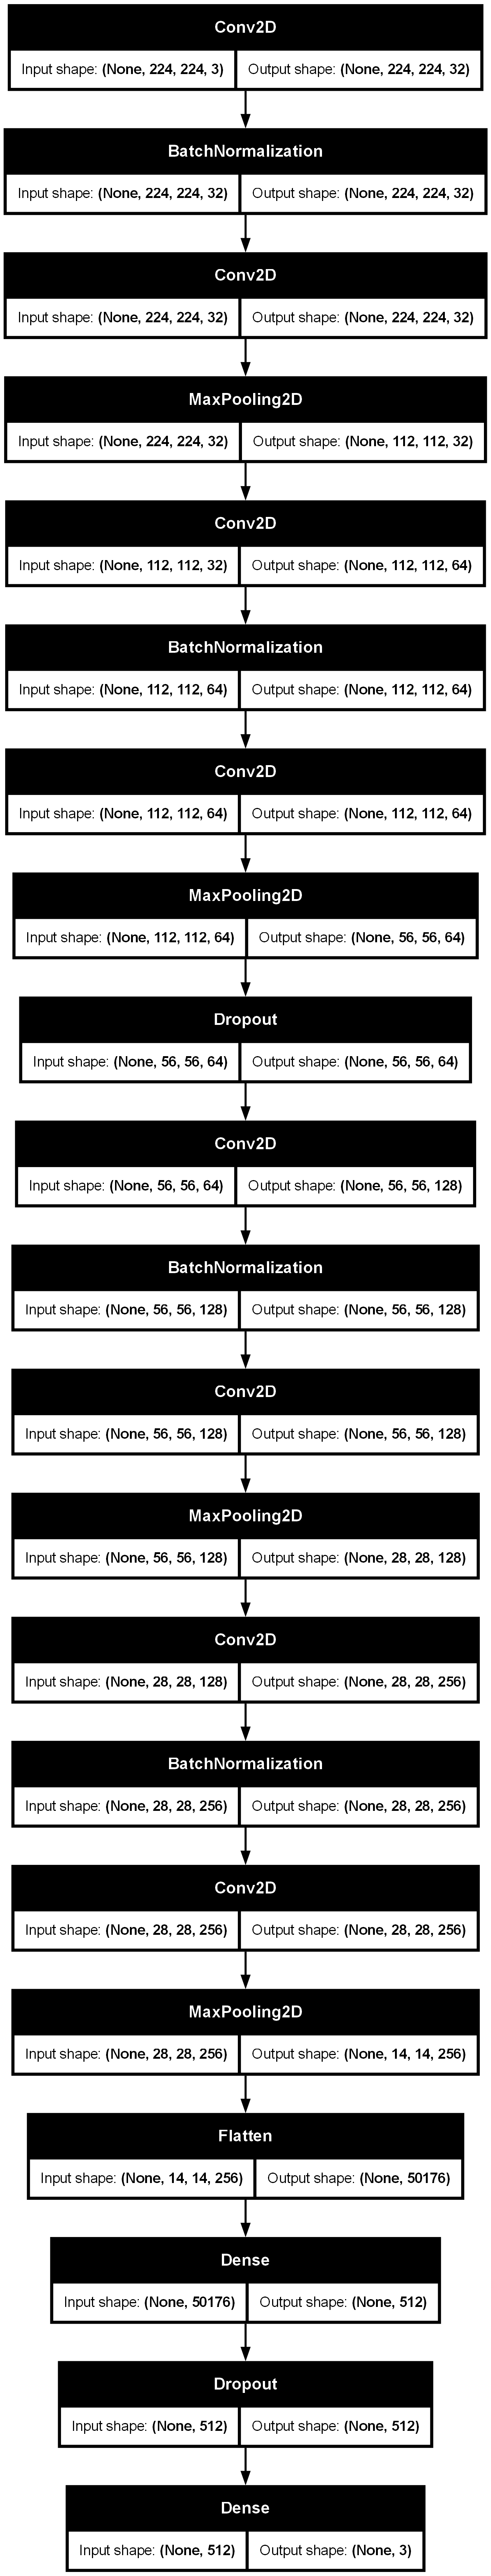

In [17]:
tf.keras.utils.plot_model(model_complex, show_shapes=True)

#### Affichage du résumé du modèle complexe :
Voici le résumé détaillé du modèle complexe:

In [18]:
model_complex.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,866,339 (102.49 MB)

 Trainable params: 26,865,379 (102.48 MB)

 Non-trainable params: 960 (3.75 KB)

#### Entrainement du modèle complexe:

j'entraines le modèle complexe sur 100 epochs:

In [19]:
# Entraînement du modèle
history_complex = model_complex.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 872ms/step - accuracy: 0.3042 - loss: 10.4557 - val_accuracy: 0.3125 - val_loss: 1.2012
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 858ms/step - accuracy: 0.4271 - loss: 1.6833 - val_accuracy: 0.3750 - val_loss: 1.2032
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 836ms/step - accuracy: 0.4443 - loss: 1.3505 - val_accuracy: 0.3125 - val_loss: 1.2052
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 860ms/step - accuracy: 0.4874 - loss: 1.2560 - val_accuracy: 0.3750 - val_loss: 1.1960
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 841ms/step - accuracy: 0.4706 - loss: 1.1576 - val_accuracy: 0.3125 - val_loss: 1.2006
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 842ms/step - accuracy: 0.4739 - loss: 1.1324 - val_accuracy: 0.3125 - val_loss: 1.2308
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 834ms/step - accuracy: 0.5497 - loss: 1.0427 - val_accuracy: 0.3125 - val_loss: 1.2714
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 840ms/step - accuracy: 0.5074 - loss: 1.0840 -

#### Calcul des prédictions et des classes réelles

In [20]:
# Calcul des prédictions et des classes réelles
y_pred = model_complex.predict(validation_generator)  # Prédictions du modèle sur les données de validation
y_true = validation_generator.classes          # Les vraies étiquettes des données de validation
y_pred_classes = np.argmax(y_pred, axis=1)     # Conversion des prédictions en classes prédominantes

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step


### Affichage de la matrice de confusion et du rapport de classification du modèle complexe:

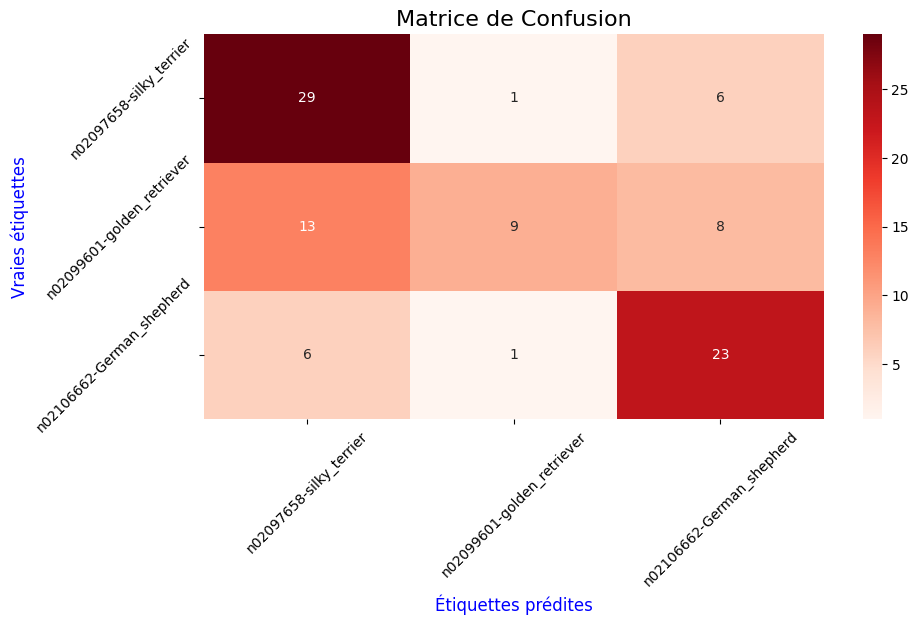

In [21]:
conf_matrix_complex = utils.plot_confusion_matrix(y_true, y_pred_classes, class_names)

In [22]:
df_report_complex = utils.classification_report_df(y_true, y_pred_classes, class_names)
display(df_report_complex)

,precision,recall,f1-score,support
n02097658-silky_terrier,0.60,0.81,0.69,36.00
n02099601-golden_retriever,0.82,0.30,0.44,30.00
n02106662-German_shepherd,0.62,0.77,0.69,30.00
accuracy,0.64,0.64,0.64,0.64
macro avg,0.68,0.62,0.61,96.00
weighted avg,0.68,0.64,0.61,96.00


### Conclusion du modèle complexe :

### Analyse Détaillée de la Matrice de Confusion

1. **Silky Terrier** :
   - **Vrais Positifs (TP)** : 29 Silky Terriers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 7 Silky Terriers sont incorrectement classifiés comme d'autres races (1 comme **Golden Retriever**, 6 comme **German Shepherds**).
   - **Faux Positifs (FP)** : 19 prédictions incorrectes où d'autres races ont été faussement identifiées comme **Silky Terriers** (13 **Golden Retrievers** et 6 **German Shepherds**).

2. **Golden Retriever** :
   - **Vrais Positifs (TP)** : 9 Golden Retrievers sont correctement identifiés.
   - **Faux Négatifs (FN)** : 21 Golden Retrievers sont incorrectement classifiés comme d'autres races (13 classés comme **Silky Terriers** et 8 comme **German Shepherds**).
   - **Faux Positifs (FP)** : 2 prédictions incorrectes où un **German Shepherd** et un **Silky Terrier** sont faussement identifiés comme **Golden Retrievers**.

3. **German Shepherd** :
   - **Vrais Positifs (TP)** : 23 German Shepherds sont correctement identifiés.
   - **Faux Négatifs (FN)** : 7 German Shepherds sont incorrectement classifiés comme d'autres races (6 comme **Silky Terriers**, 1 comme **Golden Retriever**).
   - **Faux Positifs (FP)** : 14 prédictions incorrectes où 6 **Silky Terriers** et 8 **Golden Retrievers** ont été faussement identifiés comme **German Shepherds**.

### Analyse Détaillée de la Classification :

Le modèle **complexe** affiche une performance globale modérée avec une accuracy (précision globale) de **64%** sur l'ensemble des données testées. Voici les scores F1 pour chaque classe :

- **Silky Terrier** : 
  - Précision : 60%
  - Rappel : 81%
  - F1-score : 69%
  
- **Golden Retriever** :
  - Précision : 82%
  - Rappel : 30%
  - F1-score : 44%
  
- **German Shepherd** :
  - Précision : 62%
  - Rappel : 77%
  - F1-score : 69%

### Précision Globale : **64%**

Le modèle complexe montre une capacité plus équilibrée à détecter les **Silky Terriers** et les **German Shepherds** avec un bon rappel, bien que la précision pour le **Golden Retriever** soit faible, suggérant que ce modèle confond souvent cette race avec les autres. Bien que ce modèle soit plus performant que les modèles personnalisés simples.

#### Affichage de la courbe de perte (loss) du modèle complexe :

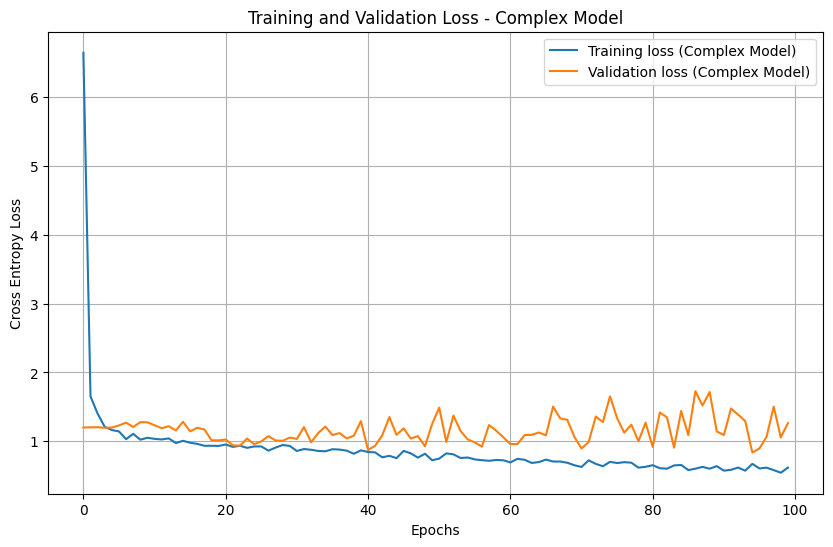

In [23]:
utils.plot_loss_curves(history_complex, model_name="Complex Model", color_chart=None)

#### Affichage du graphique des courbes d'accuracy:

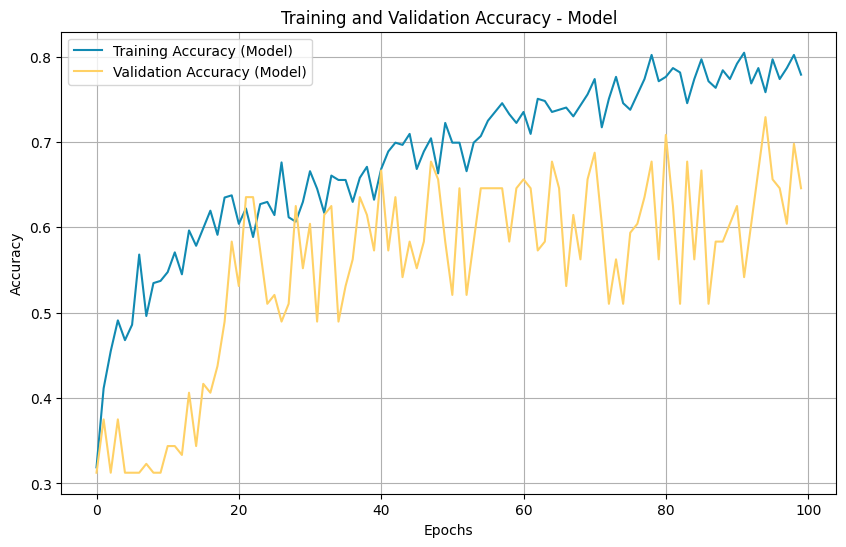

In [24]:
utils.plot_accuracy_curves(history_complex, model_name="Model", color_chart=None)

#### Conclusion:

#### Analyse de la Perte d'Entraînement et de Validation
- **Perte d'Entraînement (Bleu)** : La perte d'entraînement diminue significativement au début et se stabilise autour d'une valeur basse, indiquant un apprentissage efficace et une stabilisation des erreurs avec le temps.
- **Perte de Validation (Orange)** : Les fluctuations observées dans la perte de validation, avec des pics intermittents, suggèrent que le modèle pourrait être en train de surapprendre, car il n'arrive pas à maintenir une perte faible et constante sur les données non vues.

#### Analyse de la Précision d'Entraînement et de Validation
- **Précision d'Entraînement (Bleu)** : La précision d'entraînement s'améliore rapidement pour atteindre plus de 70%, indiquant que le modèle apprend bien les caractéristiques des données d'entraînement.
- **Précision de Validation (Orange)** : La précision de validation, bien qu'améliorée au fil du temps, présente une grande volatilité et reste généralement inférieure à celle de l'entraînement, oscillant principalement entre 50% et 70%. Cela reflète des défis de généralisation et une sensibilité aux spécificités des données de validation.

Le modèle complexe montre un apprentissage efficace mais des écarts notables entre la formation et la validation indiquent un surapprentissage, soulignant un besoin urgent de mesures pour améliorer la généralisation.

### Conclusion générale du modèle complexe :

Le modèle complexe montre une forte capacité d'apprentissage, avec une précision d'entraînement dépassant 70%, mais il présente également des difficultés de généralisation et des signes clairs de surapprentissage, illustrés par des fluctuations importantes dans la perte de validation. La matrice de confusion met en évidence des variations significatives dans la classification des races de chiens : les Silky Terriers sont bien identifiés avec une précision de 57% et un rappel élevé de 78%, les Golden Retrievers ont une haute précision mais un faible rappel, et les German Shepherds montrent un équilibre relativement meilleur entre précision et rappel. Ces observations soulignent l'importance d'adopter des stratégies pour améliorer la généralisation et réduire le surapprentissage, afin de maximiser la précision et le rappel dans la classification des différentes races.

In [25]:
# Ajout d'une colonne 'Model' pour identifier le modèle
df_report_simple['Model'] = 'Simple Model'
df_report_complex['Model'] = 'Complex Model'

# Concaténation des deux DataFrames
df_combined = pd.concat([df_report_simple, df_report_complex], axis=0)

# Affichage du DataFrame combiné
display(df_combined)

,precision,recall,f1-score,support,Model
n02097658-silky_terrier,0.57,0.72,0.63,36.00,Simple Model
n02099601-golden_retriever,0.65,0.50,0.57,30.00,Simple Model
n02106662-German_shepherd,0.70,0.63,0.67,30.00,Simple Model
accuracy,0.62,0.62,0.62,0.62,Simple Model
macro avg,0.64,0.62,0.62,96.00,Simple Model
weighted avg,0.64,0.62,0.62,96.00,Simple Model
n02097658-silky_terrier,0.60,0.81,0.69,36.00,Complex Model
n02099601-golden_retriever,0.82,0.30,0.44,30.00,Complex Model
n02106662-German_shepherd,0.62,0.77,0.69,30.00,Complex Model
accuracy,0.64,0.64,0.64,0.64,Complex Model


### `Conclusion Globale`

1. **Surapprentissage et Instabilité** :
   - Tant le modèle simple que le modèle complexe démontrent des signes de surapprentissage, avec une précision élevée sur les données d'entraînement qui ne se traduit pas par de bonnes performances sur les données de validation. Pour le modèle complexe, malgré l'utilisation de techniques avancées, la précision d'entraînement atteint environ 74% mais chute à environ 55% pour la validation, illustrant une instabilité et une mauvaise généralisation comparable à celle observée avec le modèle simple.

2. **Limitations dues à la Taille du Jeu de Données** :
   - Les deux modèles sont impactés par la taille limitée du jeu de données. Avec seulement 485 images, la diversité et la quantité des données sont insuffisantes pour entraîner efficacement des modèles complexes, ce qui limite leurs performances globales.

3. **Stratégies Recommandées** :
   - Pour surmonter ces limitations, il est conseillé d'augmenter significativement la taille du jeu de données, en visant plusieurs milliers d'images par classe pour améliorer la robustesse du modèle.
   - L'adoption de techniques de transfer learning avec des modèles pré-entraînés tels que VGG16 ou Xception est recommandée pour améliorer la généralisation. Ces approches seront explorées plus en détail dans un notebook dédié au transfer learning.
   - Il pourrait également être judicieux de simplifier l'architecture du modèle pour mieux correspondre à la taille et à la diversité actuelles des données, réduisant ainsi le risque de surapprentissage.

En conclusion, bien que les modèles simple et complexe aient montré une capacité d'apprentissage initial prometteuse, leurs performances sont entravées par des problèmes de surapprentissage et des limitations de données. L'implémentation des stratégies recommandées pourrait potentiellement améliorer leur efficacité et leur applicabilité sur de nouvelles données non vues.